<a href="https://colab.research.google.com/github/penzen/Codes-/blob/master/DeepNeauralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets # prepeared datasets that have more complex gemotry
import keras 
from keras.models import Sequential #A sequential model as per the official documentation is a linear stack of layers.
#Neural networks are actually organized in layers containing interconnected notes and the most basic
#case of a neural network that we previously discussed, the Perceptron.
from keras.layers import Dense # used to connect all the neaural network together, the input, hidden layers and the output. 
from keras.optimizers import Adam 

In [ ]:
np.random.seed(0)

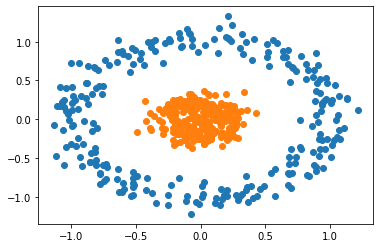

In [ ]:
n_pts = 500 
X,y = datasets.make_circles(n_samples=n_pts,random_state= 123, noise=0.1,factor= 0.2) #factor is the size of the circles                        # the noice is basically how difficult  you want the data set to be. 
plt.scatter(X[y==0 , 0], X[y == 0 , 1]) # grab all the 0 from the index 0  # grab all the 0 from the index 1
plt.scatter(X[y==1 , 0], X[y == 1 , 1]) # 0 is the outer laywer that we do not classify.
# the values of x corrispond to y because they because the - values in x are 1 and the + values which we  wanna classify are 0. 

In [ ]:
model = Sequential()
model.add(Dense(4, input_shape = (2,), activation = 'sigmoid')) # adds layers to the model 
# input shape is the input nodes which is connected to the 4 hidden nodes in layer 
# the input_shape refeerst to the amounto of input nodes in the neuran network.  
model.add(Dense(1,activation = 'sigmoid')) # this will be the output layer connected to the hidden layer(hidden nodes) which is connected to the input layer(input nodes.)
# The above model.add does not require  a input shape because it is already specified in the previous line of code 
model.compile(Adam(learning_rate = 0.01),"binary_crossentropy",metrics = ['accuracy']) # we are using binary cross entropy because we are only classifing to points 0 and 1 (red and blue)


Epoch 1/100
25/25 [==============================] - 13s 1ms/step - loss: 0.6915 - accuracy: 0.6565
Epoch 2/100
25/25 [==============================] - 0s 995us/step - loss: 0.6902 - accuracy: 0.5938
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.5074
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4257
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5611
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.3951
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.6327
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.6645
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.6760
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5340
Epoch 

Text(0.5, 1.0, 'acc')

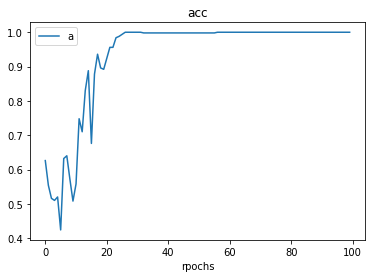

In [ ]:
h = model.fit(x = X, y = y, verbose = 1,batch_size= 20,epochs= 100,shuffle= 'true') #batch size takes 25 itteration to  make one epochs
plt.plot(h.history['accuracy'])
plt.xlabel('rpochs')
plt.legend('accuracy')
plt.title('acc')

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0241 - accuracy: 1.0000
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 1.0000
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0228 - accuracy: 1.0000
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0223 - accuracy: 1.0000
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 1.0000
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 1.0000
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 1.0000
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0206 - accuracy: 1.0000
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 1.0000
Epoch 11/

Text(0.5, 1.0, 'loss')

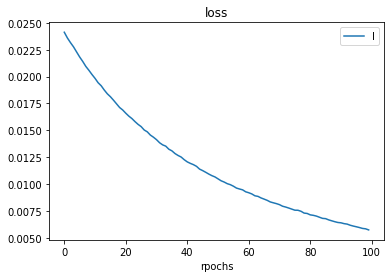

In [ ]:
h = model.fit(x = X, y = y, verbose = 1,batch_size= 20,epochs= 100,shuffle= 'true') #batch size takes 25 itteration to  make one epochs
plt.plot(h.history['loss'])
plt.xlabel('rpochs')
plt.legend('loss')
plt.title('loss')

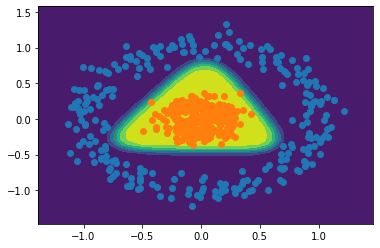

In [ ]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])


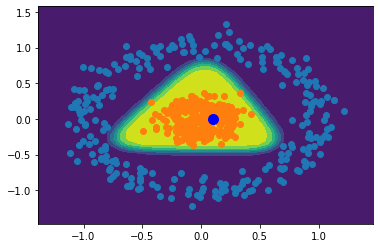

In [ ]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
x = 0.1 
y = 0
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x], [y], marker = "o",markersize = 10,color = 'blue')

